# Network 

In [290]:
import pandas as pd
import numpy as np
import pickle

In [291]:
tot_df = pd.read_pickle("data/final_df.pkl")

In [298]:
tot_df[(tot_df.area_crops =='Sweden')&(tot_df.item_trades =='Wheat')]

,area_code,area_crops,item_crops,year,item_trades,area_harvested,production,yield,export_q,export_v,import_q,import_v,hs12_code,parent_group,child_group,parent_description,child_description,ISO3 Code
574507,210,Sweden,Wheat,1961,Wheat,257199.0,839170.0,32627.0,215300.0,13130.0,109500.0,7880.0,100111,10,1001,Cereals,Wheat and meslin,SWE
574510,210,Sweden,Wheat,1962,Wheat,296098.0,906330.0,30609.0,145800.0,8640.0,122700.0,8810.0,100111,10,1001,Cereals,Wheat and meslin,SWE
574513,210,Sweden,Wheat,1963,Wheat,230533.0,695500.0,30169.0,226500.0,12400.0,199000.0,14670.0,100111,10,1001,Cereals,Wheat and meslin,SWE
574516,210,Sweden,Wheat,1964,Wheat,259300.0,1064510.0,41053.0,218200.0,12630.0,151400.0,11540.0,100111,10,1001,Cereals,Wheat and meslin,SWE
574519,210,Sweden,Wheat,1965,Wheat,276800.0,1038000.0,37500.0,348900.0,19230.0,64900.0,4960.0,100111,10,1001,Cereals,Wheat and meslin,SWE
574522,210,Sweden,Wheat,1966,Wheat,194599.0,591030.0,30372.0,155597.0,8707.0,83229.0,6438.0,100111,10,1001,Cereals,Wheat and meslin,SWE
574525,210,Sweden,Wheat,1967,Wheat,254250.0,1130330.0,44457.0,243944.0,14237.0,41097.0,3340.0,100111,10,1001,Cereals,Wheat and meslin,SWE
574528,210,Sweden,Wheat,1968,Wheat,248102.0,1073550.0,43271.0,289573.0,15530.0,57671.0,4426.0,100111,10,1001,Cereals,Wheat and meslin,SWE
574531,210,Sweden,Wheat,1969,Wheat,265339.0,916530.0,34542.0,262591.0,14703.0,46996.0,3491.0,100111,10,1001,Cereals,Wheat and meslin,SWE
574534,210,Sweden,Wheat,1970,Wheat,264753.0,962130.0,36341.0,279863.0,16004.0,40443.0,3052.0,100111,10,1001,Cereals,Wheat and meslin,SWE


In [14]:
# Load the dataset
df_country = pd.read_csv('Data/GroupsCountry.csv')
df_country.columns = map(lambda name : name.lower().replace(' ', '_'), df_country.columns) #Column names to lower case
df_country.head()

,country_group_code,country_group,country_code,country,m49_code,iso2_code,iso3_code
0,5100,Africa,4,Algeria,12,DZ,DZA
1,5100,Africa,7,Angola,24,AO,AGO
2,5100,Africa,53,Benin,204,BJ,BEN
3,5100,Africa,20,Botswana,72,BW,BWA
4,5100,Africa,233,Burkina Faso,854,BF,BFA


In [15]:
# Create a dictionnary that regroup all the countries in one country group
dicts = {}
list_group = df_country['country_group_code'].unique()
keys = list_group
for i in range(len(list_group)):
    dicts[list_group[i]]= df_country[df_country['country_group_code']==list_group[i]]['country_code'].unique()

In [207]:
# Create dictionnary for name + subregions
dicts_country = {}
keys = list_group
for i in range(len(list_group)):
    dicts_country[list_group[i]] = df_country['country_group'].unique()[i]

In [208]:
# Display all the suregions and their name
pd.DataFrame.from_dict(dicts_country,orient='index',columns=['regions'])

,regions
5100,Africa
5200,Americas
5300,Asia
5501,Australia and New Zealand
5206,Caribbean
5204,Central America
5301,Central Asia
5101,Eastern Africa
5302,Eastern Asia
5401,Eastern Europe


- 5100 Africa
- 5101 Eastern Africa
- 5102 Middle Africa
- 5103 Northern Africa
- 5104 Southern Africa
- 5105 Western Africa

In [209]:
list_regions = [5100, 5101, 5102, 5103, 5104, 5105]

In [232]:
list_crops = tot_df.child_group.unique()

<IPython.core.display.Javascript object>


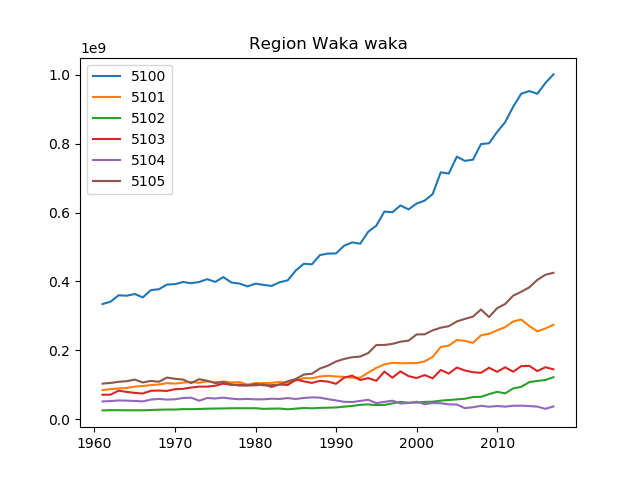

Text(0.5, 1.0, 'Region Waka waka')

In [251]:
i = 4
plt.plot(tot_df[tot_df.area_code.isin( tot_df[tot_df.area_code.isin(dicts.get(list_regions[0]))].area_code.unique())].groupby(['year'])['area_harvested'].sum(), label=str(list_regions[0]))
plt.plot(tot_df[tot_df.area_code.isin( tot_df[tot_df.area_code.isin(dicts.get(list_regions[1]))].area_code.unique())].groupby(['year'])['area_harvested'].sum(), label=str(list_regions[1]))
plt.plot(tot_df[tot_df.area_code.isin( tot_df[tot_df.area_code.isin(dicts.get(list_regions[2]))].area_code.unique())].groupby(['year'])['area_harvested'].sum(), label=str(list_regions[2]))
plt.plot(tot_df[tot_df.area_code.isin( tot_df[tot_df.area_code.isin(dicts.get(list_regions[3]))].area_code.unique())].groupby(['year'])['area_harvested'].sum(), label=str(list_regions[3]))
plt.plot(tot_df[tot_df.area_code.isin( tot_df[tot_df.area_code.isin(dicts.get(list_regions[4]))].area_code.unique())].groupby(['year'])['area_harvested'].sum(), label=str(list_regions[4]))
plt.plot(tot_df[tot_df.area_code.isin( tot_df[tot_df.area_code.isin(dicts.get(list_regions[5]))].area_code.unique())].groupby(['year'])['area_harvested'].sum(), label=str(list_regions[5]))
plt.legend()
plt.title(f'Region Waka waka')

In [289]:
tot_df[tot_df.area_code.isin(dicts.get(5000))]

,area_code,area_crops,item_crops,year,item_trades,area_harvested,production,yield,export_q,export_v,import_q,import_v,hs12_code,parent_group,child_group,parent_description,child_description
0,1,Armenia,Wheat,1992,Wheat,65500.0,141483.0,21600.0,NaN,NaN,400000.0,60000.0,100111,10,1001,Cereals,Wheat and meslin
1,1,Armenia,Wheat,1993,Wheat,97900.0,217900.0,22257.0,NaN,NaN,408000.0,59000.0,100111,10,1001,Cereals,Wheat and meslin
2,1,Armenia,Wheat,1993,"Flour, wheat",97900.0,217900.0,22257.0,NaN,NaN,46000.0,9400.0,100111,10,1001,Cereals,Wheat and meslin
3,1,Armenia,Wheat,1994,Wheat,85697.0,152900.0,17842.0,NaN,NaN,327000.0,52000.0,100111,10,1001,Cereals,Wheat and meslin
4,1,Armenia,Wheat,1994,"Flour, wheat",85697.0,152900.0,17842.0,NaN,NaN,55000.0,14700.0,100111,10,1001,Cereals,Wheat and meslin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700355,299,Occupied Palestinian Territory,"Maize, green",2011,"Maize, green",519.0,6796.0,130884.0,NaN,NaN,0.0,0.0,070999,07,0709,Vegetables and certain roots and tubers; edible,"Vegetables; n.e.c. in chapter 07, fresh or chi..."
700356,299,Occupied Palestinian Territory,"Maize, green",2012,"Maize, green",845.0,11063.0,130995.0,NaN,NaN,0.0,0.0,070999,07,0709,Vegetables and certain roots and tubers; edible,"Vegetables; n.e.c. in chapter 07, fresh or chi..."
700357,299,Occupied Palestinian Territory,"Maize, green",2013,"Maize, green",823.0,10785.0,131106.0,NaN,NaN,0.0,0.0,070999,07,0709,Vegetables and certain roots and tubers; edible,"Vegetables; n.e.c. in chapter 07, fresh or chi..."
700358,299,Occupied Palestinian Territory,"Maize, green",2014,"Maize, green",832.0,10919.0,131218.0,2.0,15.0,NaN,NaN,070999,07,0709,Vegetables and certain roots and tubers; edible,"Vegetables; n.e.c. in chapter 07, fresh or chi..."


In [288]:
tot_df[tot_df.area_code.isin(dicts.get(5000))].groupby('area_code','')

,area_code,area_crops,item_crops,year,item_trades,area_harvested,production,yield,export_q,export_v,import_q,import_v,hs12_code,parent_group,child_group,parent_description,child_description
0,1,Armenia,Wheat,1992,Wheat,65500.0,141483.0,21600.0,NaN,NaN,400000.0,60000.0,100111,10,1001,Cereals,Wheat and meslin
1,1,Armenia,Wheat,1993,Wheat,97900.0,217900.0,22257.0,NaN,NaN,408000.0,59000.0,100111,10,1001,Cereals,Wheat and meslin
2,1,Armenia,Wheat,1993,"Flour, wheat",97900.0,217900.0,22257.0,NaN,NaN,46000.0,9400.0,100111,10,1001,Cereals,Wheat and meslin
3,1,Armenia,Wheat,1994,Wheat,85697.0,152900.0,17842.0,NaN,NaN,327000.0,52000.0,100111,10,1001,Cereals,Wheat and meslin
4,1,Armenia,Wheat,1994,"Flour, wheat",85697.0,152900.0,17842.0,NaN,NaN,55000.0,14700.0,100111,10,1001,Cereals,Wheat and meslin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700355,299,Occupied Palestinian Territory,"Maize, green",2011,"Maize, green",519.0,6796.0,130884.0,NaN,NaN,0.0,0.0,070999,07,0709,Vegetables and certain roots and tubers; edible,"Vegetables; n.e.c. in chapter 07, fresh or chi..."
700356,299,Occupied Palestinian Territory,"Maize, green",2012,"Maize, green",845.0,11063.0,130995.0,NaN,NaN,0.0,0.0,070999,07,0709,Vegetables and certain roots and tubers; edible,"Vegetables; n.e.c. in chapter 07, fresh or chi..."
700357,299,Occupied Palestinian Territory,"Maize, green",2013,"Maize, green",823.0,10785.0,131106.0,NaN,NaN,0.0,0.0,070999,07,0709,Vegetables and certain roots and tubers; edible,"Vegetables; n.e.c. in chapter 07, fresh or chi..."
700358,299,Occupied Palestinian Territory,"Maize, green",2014,"Maize, green",832.0,10919.0,131218.0,2.0,15.0,NaN,NaN,070999,07,0709,Vegetables and certain roots and tubers; edible,"Vegetables; n.e.c. in chapter 07, fresh or chi..."


In [277]:
tot_df[tot_df.area_code.isin(tot_df[tot_df.area_code.isin(dicts.get(list_regions[1]))].area_code.unique())]

,area_code,area_crops,item_crops,year,item_trades,area_harvested,production,yield,export_q,export_v,import_q,import_v,hs12_code,parent_group,child_group,parent_description,child_description
84407,29,Burundi,Wheat,1961,Wheat,9000.0,4000.0,4444.0,NaN,NaN,0.0,0.0,100111,10,1001,Cereals,Wheat and meslin
84408,29,Burundi,Wheat,1961,"Flour, wheat",9000.0,4000.0,4444.0,NaN,NaN,1500.0,330.0,100111,10,1001,Cereals,Wheat and meslin
84409,29,Burundi,Wheat,1961,"Bran, wheat",9000.0,4000.0,4444.0,0.0,0.0,NaN,NaN,100111,10,1001,Cereals,Wheat and meslin
84410,29,Burundi,Wheat,1962,Wheat,9100.0,6500.0,7143.0,NaN,NaN,0.0,0.0,100111,10,1001,Cereals,Wheat and meslin
84411,29,Burundi,Wheat,1962,"Flour, wheat",9100.0,6500.0,7143.0,NaN,NaN,1600.0,350.0,100111,10,1001,Cereals,Wheat and meslin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698750,277,South Sudan,Pineapples,2016,Pineapples,1290.0,5000.0,38757.0,NaN,NaN,26.0,12.0,080430,08,0804,"Fruit and nuts, edible; peel of citrus fruit o...","Dates, figs, pineapples, avocados, guavas, man..."
698751,277,South Sudan,Pineapples,2016,Pineapples canned,1290.0,5000.0,38757.0,NaN,NaN,0.0,0.0,080430,08,0804,"Fruit and nuts, edible; peel of citrus fruit o...","Dates, figs, pineapples, avocados, guavas, man..."
698752,277,South Sudan,Pineapples,2017,Pineapples,1409.0,5500.0,39046.0,NaN,NaN,42.0,15.0,080430,08,0804,"Fruit and nuts, edible; peel of citrus fruit o...","Dates, figs, pineapples, avocados, guavas, man..."
698753,277,South Sudan,Pineapples,2017,Pineapples canned,1409.0,5500.0,39046.0,NaN,NaN,20.0,18.0,080430,08,0804,"Fruit and nuts, edible; peel of citrus fruit o...","Dates, figs, pineapples, avocados, guavas, man..."


In [286]:
tot_df[tot_df.area_code.isin(tot_df[tot_df.area_code.isin(dicts.get(list_regions[1]))].area_code.unique())].groupby(['area_crops','item_crops','year']).agg('{
    'area_code' : 'first',
    'unit' : 'first',
    'hs12_code' : 'first',
    'parent_group' : 'first',
    'child_group' : 'first',
    'export_quantity' : 'sum',
    'export_value' : 'sum',
    'import_quantity' : 'sum',
    'import_value'  : 'sum'    
}').loc['Burundi','Wheat']

,area_code,area_harvested,production,yield,export_q,export_v,import_q,import_v
year,,,,,,,,
1961,87,27000.0,12000.0,13332.0,0.0,0.0,1500.0,330.0
1962,87,27300.0,19500.0,21429.0,0.0,0.0,1600.0,350.0
1963,87,31800.0,22200.0,20943.0,0.0,0.0,1700.0,370.0
1964,87,34200.0,22200.0,19473.0,0.0,0.0,1816.0,400.0
1965,87,36600.0,24600.0,20163.0,0.0,0.0,2371.0,447.0
1966,87,36450.0,24690.0,20322.0,0.0,0.0,3771.0,673.0
1967,87,36600.0,25200.0,20655.0,0.0,0.0,2932.0,493.0
1968,87,37500.0,29400.0,23520.0,0.0,0.0,4506.0,725.0
1969,87,24099.0,13161.0,16383.0,0.0,0.0,5907.0,813.0


In [167]:
network_base = tot_df_2017.groupby(['child_group','area_crops']).sum().reset_index()[['child_group','area_crops']]

In [168]:
network_base

,child_group,area_crops
0,0701,Algeria
1,0701,Angola
2,0701,Benin
3,0701,Burkina Faso
4,0701,Burundi
...,...,...
1142,4001,Nigeria
1143,5301,Egypt
1144,5303,Cameroon
1145,5303,Egypt


In [169]:
network_base.values[0]

array(['0701', 'Algeria'], dtype=object)

In [170]:
B = nx.Graph()

In [171]:
B.add_nodes_from(network_base.child_group.unique(), bipartite=0)

In [172]:
B.add_nodes_from(network_base.area_crops.unique(), bipartite=1)

In [173]:
tuples = [tuple(x) for x in network_base.values]

In [174]:
B.add_edges_from(tuples)

In [176]:
B.number_of_nodes()

103

In [177]:
B.number_of_edges()

1147

In [195]:
%matplotlib notebook
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

[('0701', 'Algeria'), ('0701', 'Angola'), ('0701', 'Benin'), ('0701', 'Burkina Faso'), ('0701', 'Burundi'), ('0701', 'Cabo Verde'), ('0701', 'Cameroon'), ('0701', 'Central African Republic'), ('0701', 'Chad'), ('0701', 'Comoros'), ('0701', 'Congo'), ('0701', 'Democratic Republic of the Congo'), ('0701', 'Egypt'), ('0701', 'Eritrea'), ('0701', 'Eswatini'), ('0701', 'Ethiopia'), ('0701', 'Guinea'), ('0701', 'Kenya'), ('0701', 'Lesotho'), ('0701', 'Libya'), ('0701', 'Madagascar'), ('0701', 'Malawi'), ('0701', 'Mali'), ('0701', 'Mauritania'), ('0701', 'Mauritius'), ('0701', 'Morocco'), ('0701', 'Mozambique'), ('0701', 'Namibia'), ('0701', 'Niger'), ('0701', 'Nigeria'), ('0701', 'Rwanda'), ('0701', 'Senegal'), ('0701', 'South Africa'), ('0701', 'Sudan'), ('0701', 'Tunisia'), ('0701', 'Uganda'), ('0701', 'United Republic of Tanzania'), ('0701', 'Zambia'), ('0701', 'Zimbabwe'), ('0702', 'Algeria'), ('0702', 'Angola'), ('0702', 'Benin'), ('0702', 'Botswana'), ('0702', 'Burkina Faso'), ('0702',

<IPython.core.display.Javascript object>


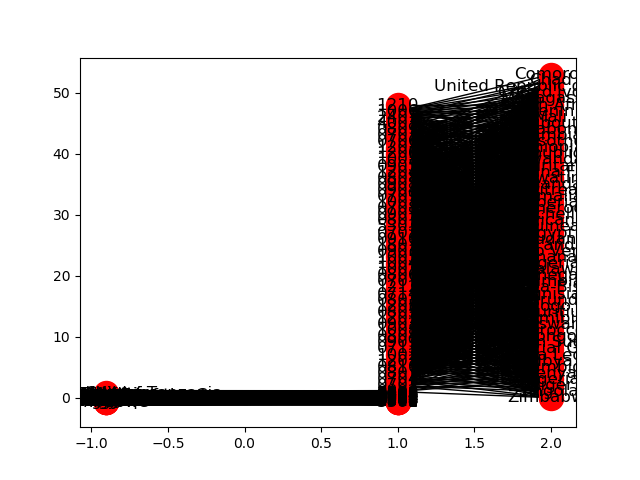

In [199]:
edges = B.edges()
print(edges)
X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw_networkx(B, pos=pos, edges=edges)
plt.show()

In [197]:
G = bipartite.overlap_weighted_projected_graph(B, network_base.area_crops.unique(), jaccard=False)

In [198]:
nx.draw_networkx(G)
plt.show()

In [185]:
from networkx.drawing.layout import bipartite_layout

In [202]:
adjency_matrix = network_base.pivot(index='child_group',columns='area_crops',values='area_crops').notnull().astype('int')

In [204]:
adjency_matrix.sum(axis=1)

child_group
0701    39
0702    41
0703    34
0704    25
0706    49
0707    16
0708    25
0709    29
0713    44
0714    44
0801    26
0802    23
0803    33
0804    43
0805    40
0806    11
0807    27
0808    10
0809    13
0810    45
0901    29
0902    17
0904    29
0905     5
0907     4
0908     5
0909     9
0910    11
1001    31
1002     1
1003    15
1004     9
1005    50
1006    42
1007    37
1008    32
1201    24
1202    47
1204     4
1205     5
1206    17
1207    33
1210     2
1212     4
1801    19
2401    35
4001    10
5301     1
5303     3
dtype: int64

In [188]:
import networkx as nx